In [1]:
# Help tools
#from IPython.core.debugger import Tracer; Tracer()()
#np.set_printoptions(threshold=np.inf)

In [2]:
import random
import numpy
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [3]:
### Exercise 1.1(b)
def generate_samples(N, total, out_subset_file, out_remaining_file):
    skip=sorted(random.sample(xrange(total),N))
    skip=set(skip)
    count=0
    with open('../data/landsat_train.csv') as f:
      with open(out_subset_file,'w') as f1:
        with open(out_remaining_file, 'w') as f2:
          for line in f:
            if count in skip:
               f1.write(line)
               skip.remove(count)
            else:
               f2.write(line)
            count+=1

In [5]:
n=25667779
s=100000
generate_samples(s, n, '../out/landsat_train_subset.csv', '../out/landsat_train_remaining.csv')

In [6]:
### Exercise 1.2
print("Load the data...")
data_train = np.genfromtxt("../out/landsat_train_subset.csv", delimiter=",")
Xtrain, Ytrain = data_train[:,1:], data_train[:,0]

Load the data...


In [7]:
print("Train random forest...")
rf=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=None,min_samples_split=2,max_features=None)
rf.fit(Xtrain,Ytrain)
pred=rf.predict(Xtrain)

Train random forest...


In [8]:
count=0
print("Calculating misclassification error...")
for i in range(len(pred)):
    if pred[i]==Ytrain[i]:
       count+=1
error=1.0 - count/100000.0
print("Misclassification error: %f" % error)
print("Saving model...")
filename='../out/model.sav'
pickle.dump(rf,open(filename,'wb'))

Calculating misclassification error...
Misclassification error: 0.002980
Saving model...


In [9]:
### Exercise 1.3
filename='../out/model.sav'
print("Loading model...")
loaded_model=pickle.load(open(filename,'rb'))
#chunk generator function
def chunk_generator(fname, chunk_size=1000):
    data = []
    counter = 0
    with open(fname, 'r') as ifile:

        for line in ifile:
            if not line.startswith("#") and counter < chunk_size:
                line = line.split(",")
                data.append([float(p) for p in line])
                counter += 1
            if counter == chunk_size:
                counter = 0
                yield data
                data = []

        # process remaining elements
        if len(data) > 0:
            yield data

Loading model...


In [10]:
def mis_error(pred,y):
    count=0
    for i in range(len(pred)):
        if pred[i]==y[i]:
           count+=1
    error=1.0-(count/float(len(pred)))
    return error

In [11]:
print("Calculating the prediction for landsat_remaining...")
preds=[]
Ytest=[]
for chunk in chunk_generator("../out/landsat_train_remaining.csv",chunk_size=1000):
	preds+=list(loaded_model.predict(np.array(chunk)[:,1:]))
	Ytest+=list(np.array(chunk)[:,0])
print("Calculating the misclassification error...")
error=mis_error(preds,Ytest)
print("Misclassication error on landsat_train_remaining is %f" % error)
print("Saving prediction and yvalues to file...")
np.savetxt('../out/landsat_train_remaining_preds.csv',np.array(preds),delimiter=',',fmt='%i')
np.savetxt('../out/landsat_train_remaining_y.csv',np.array(Ytest),delimiter=',',fmt='%i')

Calculating the prediction for landsat_remaining...
Calculating the misclassification error...
Misclassication error on landsat_train_remaining is 0.070551
Saving prediction and yvalues to file...


In [12]:
preds=[]
Ytest=[]
print("Calculating predictions for landsat_test...")
for chunk in chunk_generator("../data/landsat_test.csv",chunk_size=1000):
	preds+=list(loaded_model.predict(np.array(chunk)))
print("Saving predictions to file...")
np.savetxt('../out/landsat_test_preds.csv',np.array(preds),delimiter=',',fmt='%i')

Calculating predictions for landsat_test...
Saving predictions to file...


In [13]:
def convert_to_image(data):
    # convert the arrays to a 3000, 3000 matrix
    preds_np = np.array(data)
    return preds_np.reshape(3000,3000)

In [14]:
# function to plot the predicted classes
def plot_image(data):
    alpha = range(2,8,1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

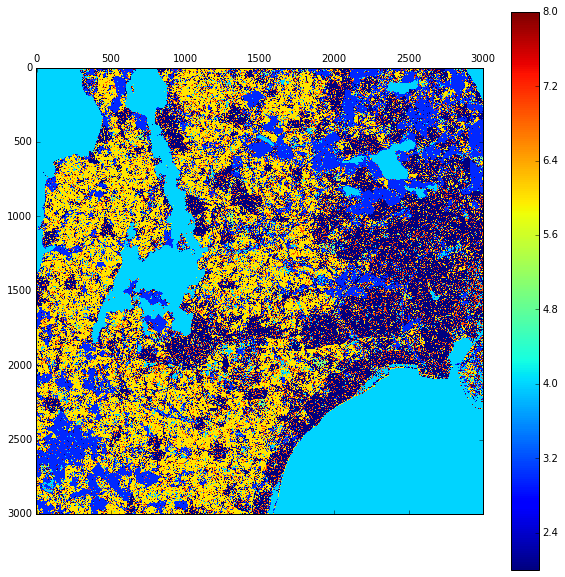

In [15]:
plot_image(convert_to_image(preds))

In [16]:
### Exercise 1.4
n=25667779
s=1000000
generate_samples(s, n, '../out/landsat_train_subset_14.csv', '../out/landsat_train_remaining_14.csv')

In [17]:
print("Load the data...")
data_train = np.genfromtxt("../out/landsat_train_subset_14.csv", delimiter=",")
Xtrain, Ytrain = data_train[:,1:], data_train[:,0]

Load the data...


In [18]:
print("Train random forest...")
rf=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,max_features=None)
rf.fit(Xtrain,Ytrain)

Train random forest...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
preds=[]
Ytest=[]
print("Calculating predictions for landsat_test...")
for chunk in chunk_generator("../data/landsat_test.csv",chunk_size=1000):
    preds+=list(rf.predict(np.array(chunk)))
print("Saving predictions to file...")
np.savetxt('../out/landsat_test_preds_14.csv',np.array(preds),delimiter=',',fmt='%i')

Calculating predictions for landsat_test...
Saving predictions to file...


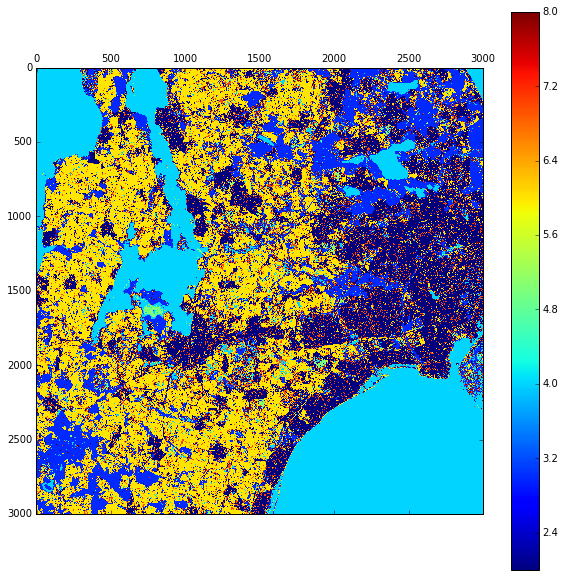

In [20]:
plot_image(convert_to_image(preds))